In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/MDD/Covid Detection')
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/MDD/Covid Detection


In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

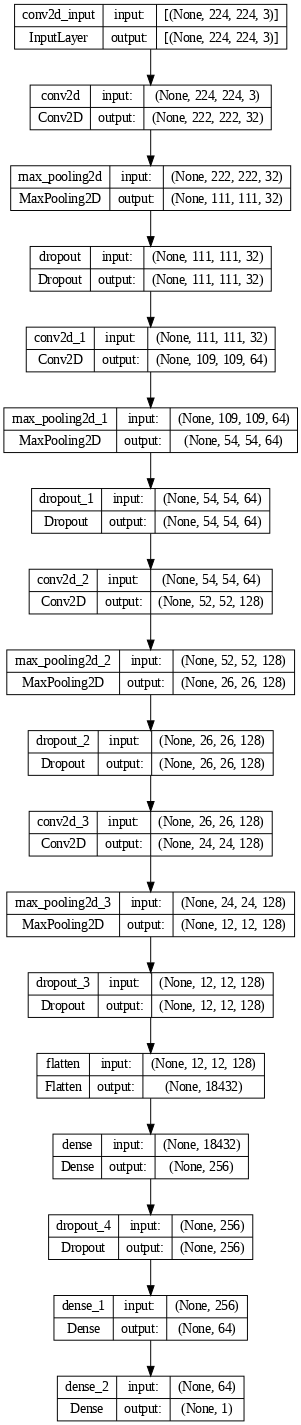

In [ ]:
model = Sequential()

# # Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# # Flatten layer
model.add(Flatten())

# # Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# # Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Compile the model
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

# # Print model summary
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=70, expand_nested=False)

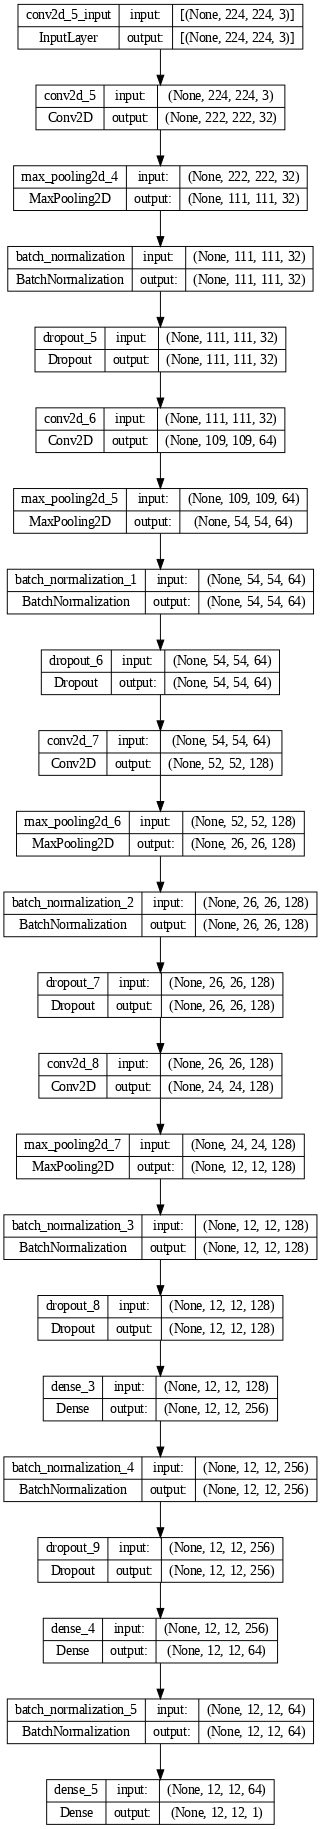

In [ ]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=70, expand_nested=False)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

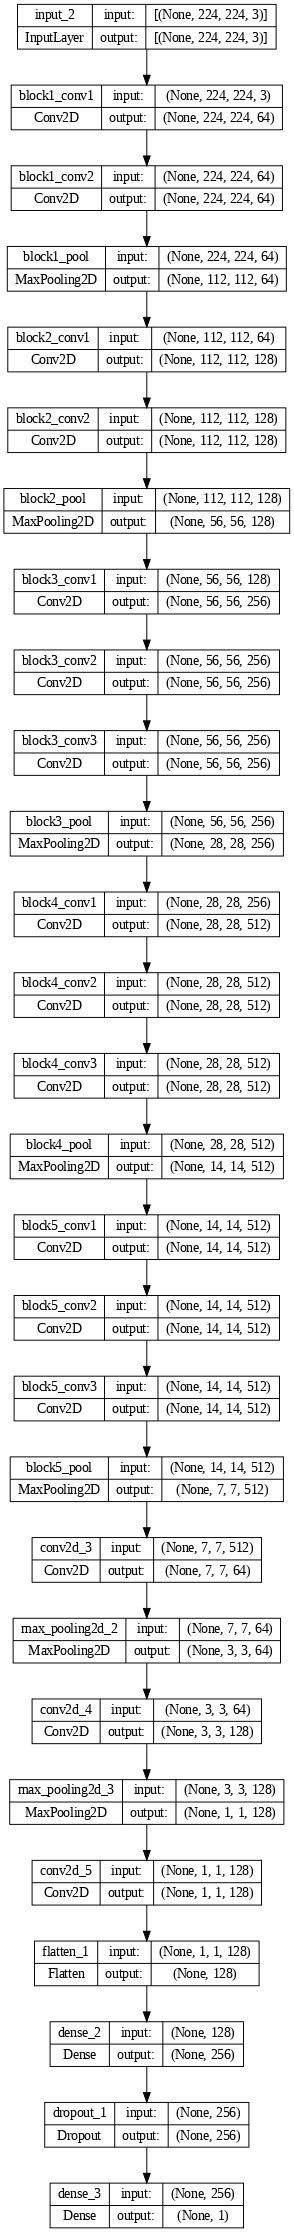

In [ ]:



# Load the pre-trained VGG-16 model without the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG-16 layers so they are not updated during training
for layer in vgg_base.layers:
    layer.trainable = False

# Define the dilated CNN layers
x = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(vgg_base.output)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
# x = MaxPooling2D((2, 2))(x)  # Remove this line or reduce the pool size if necessary
x = Flatten()(x)

# Add fully connected layers for classification
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine VGG-16 frontend with dilated CNN backend
combined_model = Model(inputs=vgg_base.input, outputs=predictions)

# Compile the model
combined_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy'])

# Print model summary
combined_model.summary()


# Generate the visualization
plot_model(combined_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=70, expand_nested=False)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_12[0][0]']            
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                              

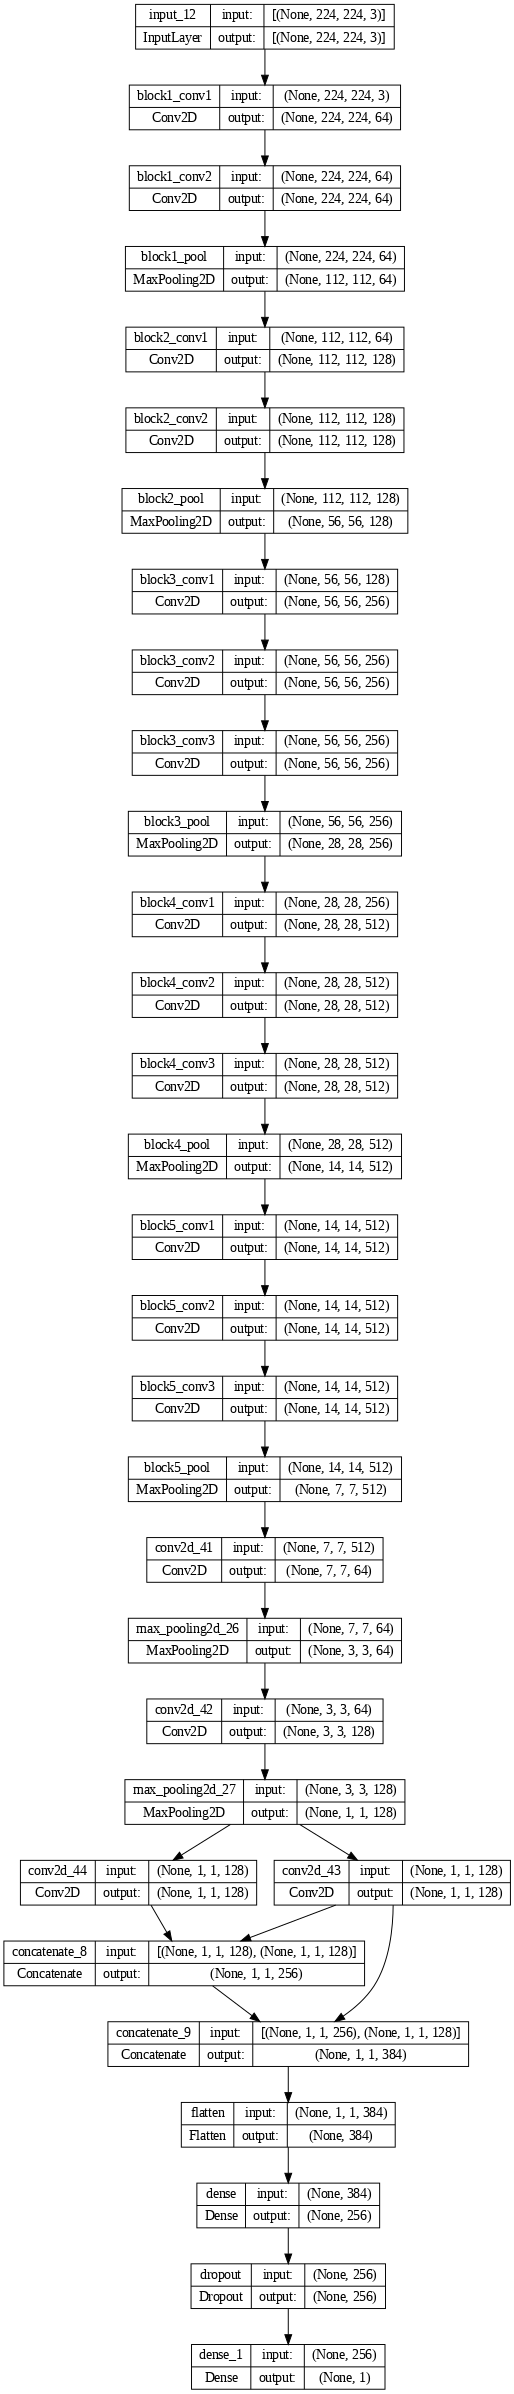

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Load the pre-trained VGG-16 model without the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG-16 layers so they are not updated during training
for layer in vgg_base.layers:
    layer.trainable = False

# Define the dilated CNN layers
x = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(vgg_base.output)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
x = MaxPooling2D((2, 2))(x)
skip_connection2 = x  # Save the feature maps from this layer for skip connection later

x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
skip_connection1 = x  # Save the feature maps from this layer for skip connection later

# Adjust spatial dimensions of skip_connection2 to match x
skip_connection2 = Conv2D(128, (1, 1), activation='relu', padding='same')(skip_connection2)
# skip_connection2 = MaxPooling2D((4, 4))(skip_connection2)  # Adjust spatial dimensions to match x

# Add skip connections
x = Concatenate()([x, skip_connection2])  # Concatenate feature maps from the second layer
x = Concatenate()([x, skip_connection1])  # Concatenate feature maps from the first layer
# x = MaxPooling2D((2, 2))(x)  # Remove this line or reduce the pool size if necessary
x = Flatten()(x)

# Add fully connected layers for classification
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine VGG-16 frontend with dilated CNN backend
combined_model = Model(inputs=vgg_base.input, outputs=predictions)

# Compile the model
combined_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Print model summary
combined_model.summary()

# Generate the visualization
plot_model(combined_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=70, expand_nested=False)


In [ ]:
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16

# Load the pre-trained VGG-16 model without the top (fully connected) layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG-16 layers so they are not updated during training
for layer in vgg_base.layers:
    layer.trainable = False

# Add a Global Average Pooling layer
x = GlobalAveragePooling2D()(vgg_base.output)

# Add fully connected layers for classification
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine VGG-16 frontend with fully connected layers
model = Model(inputs=vgg_base.input, outputs=predictions)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Model
from keras.optimizers import Adam

def CSRNetBinary(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_tensor)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model

# Define input shape based on your X-ray image size
input_shape = (224, 224, 3)

# Create CSRNetBinary model
model = CSRNetBinary(input_shape)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16

def CSRNetVGG16(input_shape):
    # Load pre-trained VGG16 model without top layers
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze VGG16 layers
    for layer in vgg_base.layers:
        layer.trainable = False

    # Extract features from VGG16
    vgg_output = vgg_base.output

    # Add dilated CNN layers
    x = Conv2D(512, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(vgg_output)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)


    x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)


    # Flatten the output for fully connected layers
    x = Flatten()(x)

    # Fully connected layers for classification
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    # Combine VGG16 frontend with dilated CNN backend
    model = Model(inputs=vgg_base.input, outputs=output_tensor)

    return model

# Define input shape based on your X-ray image size
input_shape = (224, 224, 3)

# Create CSRNetVGG16 model
model = CSRNetVGG16(input_shape)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()


58889256/58889256 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

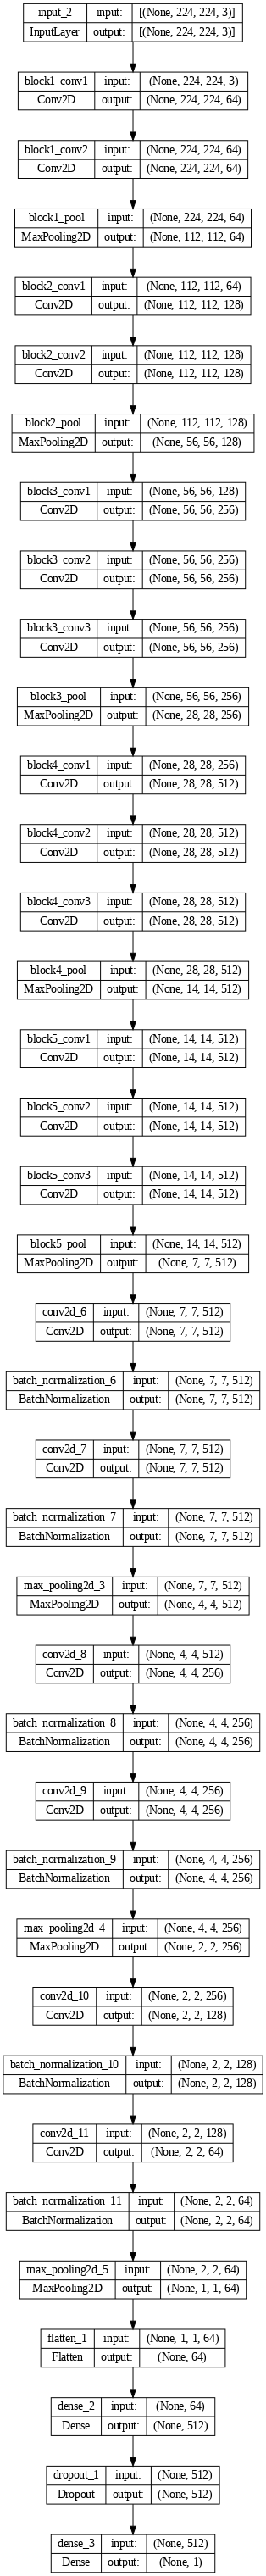

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16

def CSRNetVGG16(input_shape):
    # Load pre-trained VGG16 model without top layers
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze VGG16 layers
    for layer in vgg_base.layers:
        layer.trainable = False

    # Extract features from VGG16
    vgg_output = vgg_base.output

    # Add dilated CNN layers
    x = Conv2D(512, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(vgg_output)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', dilation_rate=(2, 2))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Flatten the output for fully connected layers
    x = Flatten()(x)

    # Fully connected layers for classification
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    # Combine VGG16 frontend with dilated CNN backend
    model = Model(inputs=vgg_base.input, outputs=output_tensor)

    return model

# Define input shape based on your X-ray image size
input_shape = (224, 224, 3)

# Create CSRNetVGG16 model
model = CSRNetVGG16(input_shape)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

# Generate the visualization
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=70, expand_nested=False)


In [ ]:

# Increase the range of shear transformation
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  # Increase shear range for more diverse transformations
    horizontal_flip=True,
    zoom_range=0.2
)

# No data augmentation for validation data
val_datagen = image.ImageDataGenerator(rescale=1./255)


In [ ]:
training_data = train_datagen.flow_from_directory('Train',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

val_data = val_datagen.flow_from_directory('Val',
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 2200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
training_data.class_indices

NameError: name 'training_data' is not defined

In [ ]:
e = 10

hist = model.fit(training_data,
                 steps_per_epoch=68,
                 epochs=e,
                 validation_data=val_data,
                 validation_steps=12)

model.save('../models/covid9.h5')
# e = 10

# hist = combined_model.fit(training_data,
#                  steps_per_epoch=68,
#                  epochs=e,
#                  validation_data=val_data,
#                  validation_steps=12)

# combined_model.save('../models/covid5.h5')

Epoch 1/10
68/68 [==============================] - 1628s 24s/step - loss: 0.2509 - accuracy: 0.8898 - val_loss: 0.4405 - val_accuracy: 0.9141
Epoch 2/10
68/68 [==============================] - 1651s 24s/step - loss: 0.1373 - accuracy: 0.9502 - val_loss: 0.3859 - val_accuracy: 0.7969
Epoch 3/10
68/68 [==============================] - 1653s 24s/step - loss: 0.1050 - accuracy: 0.9576 - val_loss: 0.1891 - val_accuracy: 0.9167
Epoch 4/10
68/68 [==============================] - 1650s 24s/step - loss: 0.1140 - accuracy: 0.9613 - val_loss: 0.1651 - val_accuracy: 0.9193
Epoch 5/10
68/68 [==============================] - 1649s 24s/step - loss: 0.0835 - accuracy: 0.9719 - val_loss: 0.2587 - val_accuracy: 0.9193
Epoch 6/10
68/68 [==============================] - 1653s 24s/step - loss: 0.0975 - accuracy: 0.9622 - val_loss: 0.7787 - val_accuracy: 0.8099
Epoch 7/10
68/68 [==============================] - 1657s 24s/step - loss: 0.0654 - accuracy: 0.9746 - val_loss: 0.2296 - val_accuracy: 0.9297

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


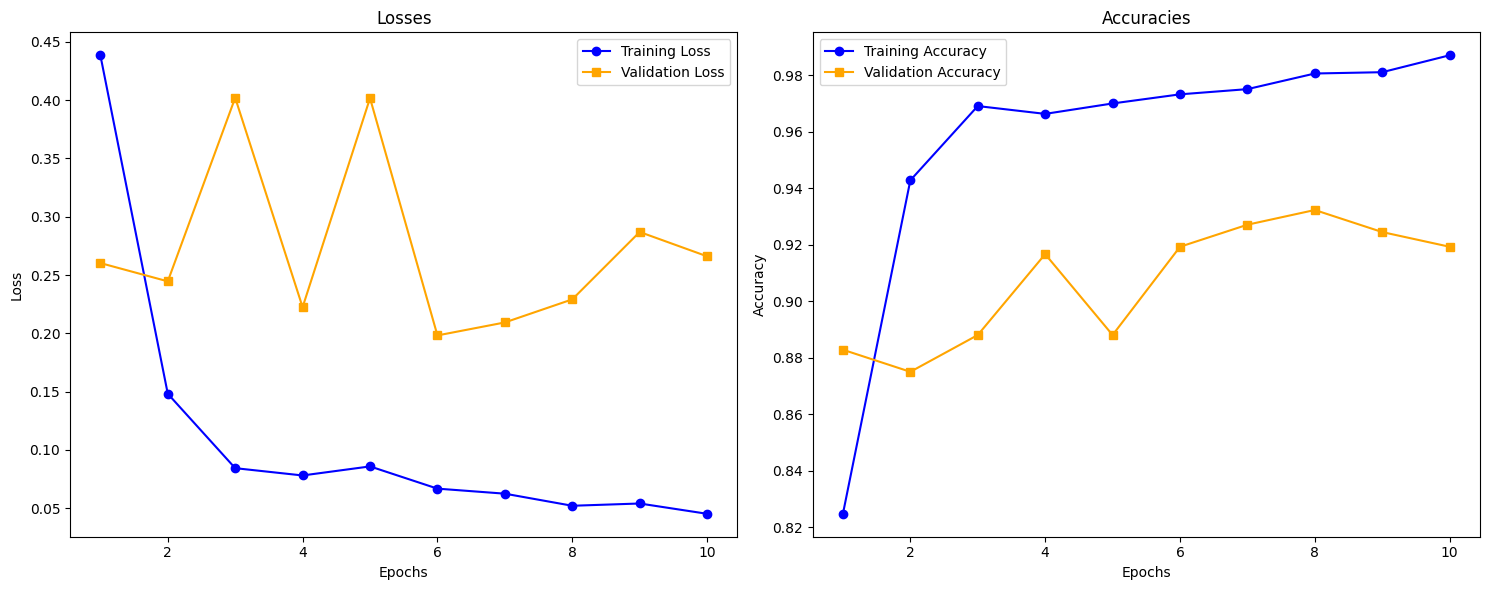

In [ ]:
# Extract metrics
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Define epochs
epochs = range(1, e + 1)

# Create subplots
plt.figure(figsize=(15, 6))

# Plot Losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='s')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange', marker='s')
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model on training data
train_loss, train_accuracy = model.evaluate_generator(training_data)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
# train_loss, train_accuracy = combined_model.evaluate_generator(training_data)
# print("Training Loss:", train_loss)
# print("Training Accuracy:", train_accuracy)

<ipython-input-13-a38ed91b187a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_loss, train_accuracy = model.evaluate_generator(training_data)


Training Loss: 0.16429094970226288
Training Accuracy: 0.9390909075737


In [ ]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate_generator(val_data)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
# val_loss, val_accuracy = combined_model.evaluate_generator(val_data)
# print("Validation Loss:", val_loss)
# print("Validation Accuracy:", val_accuracy)

<ipython-input-15-275ea0c29bad>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_accuracy = model.evaluate_generator(val_data)


Validation Loss: 0.29022541642189026
Validation Accuracy: 0.8650000095367432


In [ ]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/MDD/models/covid.h5'
loaded_model = load_model(saved_model_path)

# Compile the loaded model with the same optimizer and loss function as before
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the loaded model for additional epochs
additional_epochs = 10  # Adjust the number of additional epochs as needed
history = loaded_model.fit(training_data, epochs=40+additional_epochs, validation_data=val_data, initial_epoch=40)
model.save('../models/covid.h5')

Epoch 41/50
51/51 [==============================] - 378s 7s/step - loss: 0.2207 - accuracy: 0.9114 - val_loss: 0.2720 - val_accuracy: 0.9071
Epoch 42/50
51/51 [==============================] - 234s 5s/step - loss: 0.2063 - accuracy: 0.9258 - val_loss: 0.3083 - val_accuracy: 0.8579
Epoch 43/50
51/51 [==============================] - 222s 4s/step - loss: 0.2186 - accuracy: 0.9120 - val_loss: 0.2570 - val_accuracy: 0.8962
Epoch 44/50
51/51 [==============================] - 228s 4s/step - loss: 0.2049 - accuracy: 0.9220 - val_loss: 0.2521 - val_accuracy: 0.8962
Epoch 45/50
51/51 [==============================] - 225s 4s/step - loss: 0.1910 - accuracy: 0.9233 - val_loss: 0.2585 - val_accuracy: 0.8907
Epoch 46/50
51/51 [==============================] - 221s 4s/step - loss: 0.1900 - accuracy: 0.9233 - val_loss: 0.2652 - val_accuracy: 0.8798
Epoch 47/50
51/51 [==============================] - 228s 4s/step - loss: 0.1972 - accuracy: 0.9170 - val_loss: 0.2348 - val_accuracy: 0.9071
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Testing

1/1 [==============================] - 0s 395ms/step
Accuracy on Testing Data: 0.895


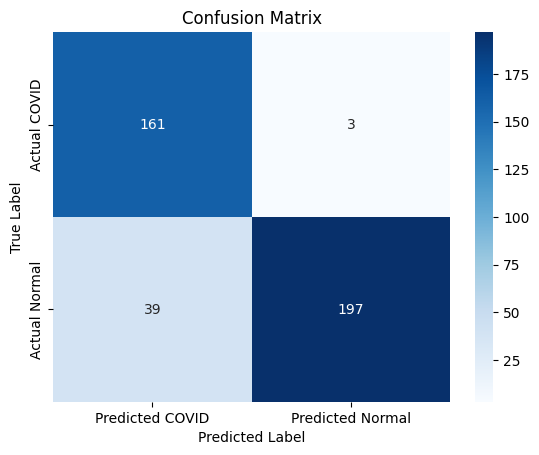

Classification Report:
              precision    recall  f1-score   support

       COVID       0.02      0.01      0.02       200
      Normal       0.17      0.20      0.18       200

    accuracy                           0.10       400
   macro avg       0.09      0.11      0.10       400
weighted avg       0.09      0.10      0.10       400



In [ ]:
import cv2
import os
import seaborn as sns
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Load the pre-trained model
model = load_model('../models/covid9.h5')

# Initialize variables to keep track of TP, TN, FP, FN
TP = TN = FP = FN = 0

# Lists to store predictions and true labels for calculating accuracy
predictions = []
true_labels = []

# Function to process images and update counts
def process_images(images_dir, true_label):
    global TP, TN, FP, FN, predictions, true_labels

    for image_file in os.listdir(images_dir):
        img = cv2.imread(os.path.join(images_dir, image_file))
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        img = img / 255.0  # Normalize pixel values

        # Predict using the model
        pred = model.predict(img)

        # Classify based on prediction
        if pred < 0.5:  # COVID class
            if true_label == 1:
                TP += 1
            else:
                FP += 1
        else:  # Normal class
            if true_label == 0:
                TN += 1
            else:
                FN += 1

        # Append predictions and true labels
        predictions.append(pred)
        true_labels.append(true_label)

# Process COVID images
process_images('Test/COVID', 1)

# Process Normal images
process_images('Test/NORMAL', 0)

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print accuracy
print("Accuracy on Testing Data:", accuracy)

# Create confusion matrix
conf_matrix = np.array([[TP, FP], [FN, TN]])

# Create heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted COVID', 'Predicted Normal'],
            yticklabels=['Actual COVID', 'Actual Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate and print classification report
class_names = ['COVID', 'Normal']
print("Classification Report:")
print(classification_report(true_labels, [1 if pred >= 0.5 else 0 for pred in predictions], target_names=class_names))
